# Importing package to be used

In [1]:
import pandas as pd # to dataframes
import matplotlib.pyplot as plt #to define plot parameters
import seaborn as sns #to graphical plots
import numpy as np #to math
plt.style.use('ggplot') # to plot graphs with gggplot2 style

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
output_notebook()

Loading BokehJS ...

In [76]:
#dataset
df=pd.read_csv('../CannaConnect/Dataset/cannabis.csv')
print(df.shape)
print(df.dtypes)
df.head()

(2351, 6)
Strain          object
Type            object
Rating         float64
Effects         object
Flavor          object
Description     object
dtype: object


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


# Exploration Data Analysis

In [77]:
#Are there any missing values?
print(df.isnull().sum())
# Drop all rows that are missing
df2=df.dropna()
# Count the number of missing values in each column (again)
print(df2.isnull().sum())
# Examine the shape of the DataFrame
print(df2.shape)

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64
Strain         0
Type           0
Rating         0
Effects        0
Flavor         0
Description    0
dtype: int64
(2277, 6)


In [78]:
#How many of each Strains? What is the repartition of the Type?
#df2.Strain=df2.Strain.astype(str)
df2.Type = df2.Type.astype(str)
#df2.Effects=df2.Effects.astype(str)
#df2.Flavor=df2.Flavor.astype(str)
#df2.Description=df2.Description.astype(str)

In [79]:
print(df2.nunique())

Strain         2276
Type              3
Rating           25
Effects        1612
Flavor         1278
Description    2271
dtype: int64


In [80]:
df2=pd.DataFrame(df2)
df2.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


# Visual exploratory data analysis

In [81]:
#Visualization of the Type
print("Numerical describe of distribuition Type")
print(df2.groupby("Type")["Strain"].count())
print("Percentage of distribuition Type ")
print((df2.groupby("Type")["Strain"].count() / len(df2.Type) * 100).round(decimals=2))

Numerical describe of distribuition Type
Type
hybrid    1169
indica     680
sativa     428
Name: Strain, dtype: int64
Percentage of distribuition Type 
Type
hybrid    51.34
indica    29.86
sativa    18.80
Name: Strain, dtype: float64


In [82]:
# Here is a list of categorical values (or factors)
Species = df2.Type.unique()
countpertype=(df2.groupby("Type")["Strain"].count()).values

# Set the x_range to the list of categories above
p = figure(x_range=Species, plot_height=250, title="Species Counts",x_axis_label='Species', y_axis_label='Count per species')

# Categorical values can also be used as coordinates
p.vbar(x=Species, top=countpertype, width=0.9)

# Set some properties to make the plot look better
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [83]:
#Visualization of the Rating
print("Top 5 Rating by consumers")
print(df2.Rating.value_counts().head())

uniquerating=df2.Rating.unique()
countperrating=df2.Rating.value_counts().values

# Set the x_range to the list of categories above
p = figure(x_range=(0,5.5), plot_height=250, title="Ratings by Description",x_axis_label='Ratings', y_axis_label='Count per Rating')

# Categorical values can also be used as coordinates
p.vbar(x=uniquerating, top=countperrating, width=0.1)

# Set some properties to make the plot look better
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

Top 5 Rating by consumers
4.5    309
4.3    295
4.4    283
4.6    238
4.2    218
Name: Rating, dtype: int64


In [84]:
#Number of Effects 5
df_effect = pd.DataFrame(df2.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

#Number of Flavor 4
df_flavors = pd.DataFrame(df2.Flavor.str.split(',',n=3,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3','Flavor_4'])

In [85]:
df=pd.concat([df_effect.reset_index(drop=True),df_flavors.reset_index(drop=True)],axis=1)
print(df.shape)
df.head()

(2277, 9)


,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [86]:
print(df2.shape)
df2.head()

(2277, 6)


,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [89]:
df2=pd.concat([df2.reset_index(drop=True),df.reset_index(drop=True)],axis=1)
print(df2.shape)
df2.head()

(2277, 15)


,Strain,Type,Rating,Effects,Flavor,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [95]:
uniqueeffect=df2['Effect_1'].dropna().unique()
countpereffect=df2['Effect_1'].value_counts().values

# Set the x_range to the list of categories above
p = figure(x_range=uniqueeffect, plot_height=250, plot_width=700, title="Effect_1 Counts",x_axis_label='Effect', y_axis_label='Count per Effect')

# Categorical values can also be used as coordinates
p.vbar(x=uniqueeffect, top=countpereffect, width=0.3)

# Set some properties to make the plot look better
p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

The first most related effects and respective Rating

The top 5 First Effects related
Relaxed     820
Happy       462
Euphoric    240
Uplifted    235
Sleepy       81
Name: Effect_1, dtype: int64


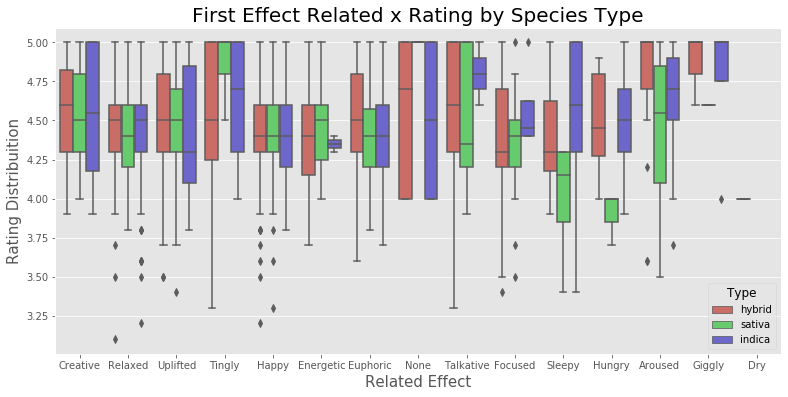

In [96]:
print("The top 5 First Effects related")
print(df2['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=df2[df2["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("First Effect Related x Rating by Species Type",fontsize=20)

plt.show()

The second most related effects and respective Rating

The top 5 Second related Effects
Happy       560
Relaxed     342
Euphoric    333
Uplifted    308
Sleepy      195
Name: Effect_2, dtype: int64


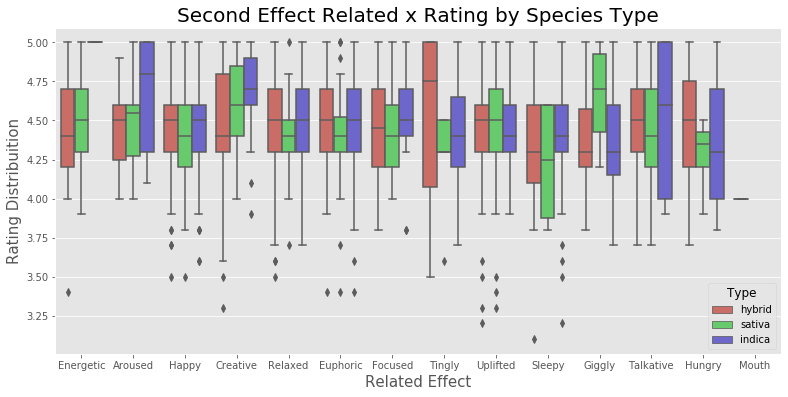

In [97]:
print("The top 5 Second related Effects")
print(df2['Effect_2'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_2', y="Rating",
                hue="Type",
                data=df2[df2["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("Second Effect Related x Rating by Species Type",fontsize=20)

plt.show()

The third most related effects and respective Rating

The top 5 Third related Effects
Euphoric    403
Happy       386
Uplifted    330
Relaxed     231
Sleepy      154
Name: Effect_3, dtype: int64


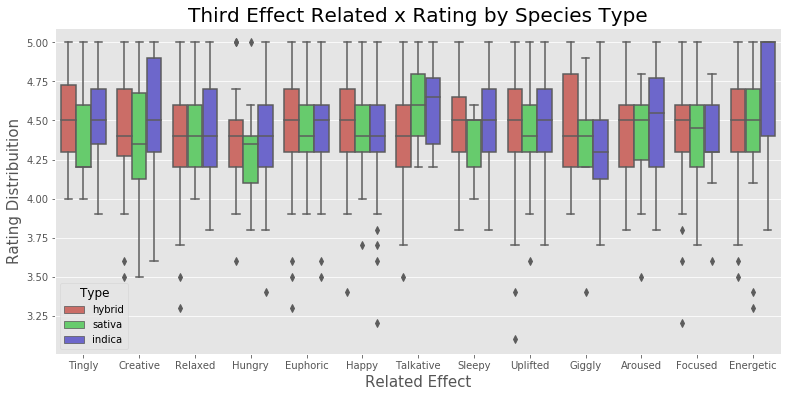

In [98]:
print("The top 5 Third related Effects")
print(df2['Effect_3'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_3', y="Rating",
                hue="Type",
                data=df2[df2["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("Third Effect Related x Rating by Species Type",fontsize=20)

plt.show()

Let's explore the Strains with Rating equal 5

In [18]:
#Which are the bad strains? What are their Effects? Flavors?
#Interractive graphic
#pie chart
#Labels, showing values, Ascending order, etc.

Percentual of Species with Rating equal 5
Type
hybrid    49.25
indica    32.66
sativa    18.09
Name: Strain, dtype: float64


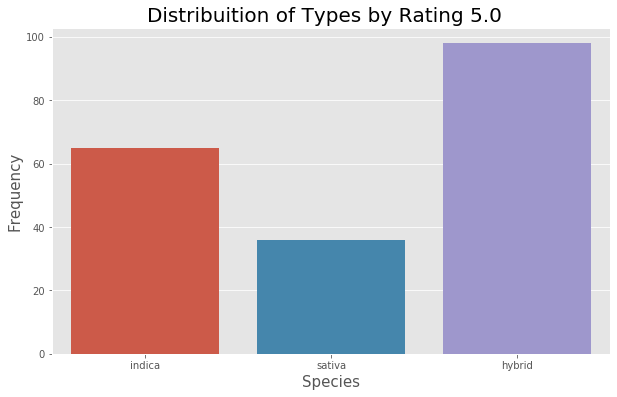

In [99]:
#Whats the type with most strains with rating 5?
print("Percentual of Species with Rating equal 5")
five_rating = (df2[df2["Rating"] == 5].groupby("Type")["Strain"].count() \
               / len(df2[df2["Rating"] == 5]) *100).round(decimals=2)
print(five_rating)
plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=df2[df2["Rating"] == 5])
g.set_xlabel('Species', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Distribuition of Types by Rating 5.0  ", fontsize=20)

plt.show()

In [100]:
df2.head()

,Strain,Type,Rating,Effects,Flavor,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [101]:
print(df2.Effect_1.value_counts(normalize = True).head())
#print(df2.Effect_2.value_counts(normalize = True).head())
#print(df2.Effect_3.value_counts(normalize = True).head())
print(df2.Effect_1.nunique())
print(df2.Effect_2.nunique())
print(df2.Effect_3.nunique())
print(df2.Effect_4.nunique())
print(df2.Effect_5.nunique())

Relaxed     0.360123
Happy       0.202899
Euphoric    0.105402
Uplifted    0.103206
Sleepy      0.035573
Name: Effect_1, dtype: float64
15
14


In [102]:
print(df2.Flavor_1.value_counts(normalize = True).head())
#print(df2.Flavor_2.value_counts(normalize = True).head())
#print(df2.Flavor_3.value_counts(normalize = True).head())
print(df2.Flavor_1.nunique())
print(df2.Flavor_2.nunique())
print(df2.Flavor_3.nunique())
print(df2.Flavor_4.nunique())

Earthy    0.231006
Sweet     0.180061
Citrus    0.080808
Berry     0.053140
None      0.048309
Name: Flavor_1, dtype: float64
48
47
48
16


In [103]:
df2.to_excel('../CannaConnect/Dataset/EDA.xlsx')

# Some NLP Exploration

In [111]:
#Total Number of Words per Descripton
from wordcloud import WordCloud, STOPWORDS
df_words = df2.Description.apply(lambda x: len(str(x).split(" ")))
print(df_words.head())
print(df_words.describe())

0    69
1    98
2    72
3    69
4    93
Name: Description, dtype: int64
count    2277.000000
mean       73.770312
std        24.759874
min         1.000000
25%        60.000000
50%        73.000000
75%        87.000000
max       329.000000
Name: Description, dtype: float64


In [112]:
#Total Number of Character per Description
df_character = df2.Description.str.len() ## this also includes spaces
print(df_character.head())
print(df_character.describe())

0    372
1    582
2    424
3    391
4    551
Name: Description, dtype: int64
count    2277.000000
mean      454.714097
std       146.626162
min         4.000000
25%       372.000000
50%       452.000000
75%       540.000000
max      1120.000000
Name: Description, dtype: float64


In [113]:
#Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))#
df_avg_word = df2.Description.astype(str).apply(lambda x: avg_word(x))
print(df_avg_word.head())
print(df_avg_word.describe())

0    4.405797
1    4.989691
2    4.902778
3    4.600000
4    4.924731
Name: Description, dtype: float64
count    2277.000000
mean        5.144461
std         0.353241
min         3.827586
25%         4.916667
50%         5.137931
75%         5.378378
max         6.500000
Name: Description, dtype: float64


In [114]:
#Number of stopwords in the Description
stopwords = set(STOPWORDS)
#stop = set(stopwords.words('english'))
df_stop_words = df2.Description.astype(str).apply(lambda x: len([x for x in x.split() if x in stopwords]))
print(df_stop_words.head())
print(df_stop_words.describe())

0    25
1    30
2    25
3    22
4    30
Name: Description, dtype: int64
count    2277.000000
mean       24.928415
std         9.488994
min         0.000000
25%        19.000000
50%        24.000000
75%        30.000000
max        83.000000
Name: Description, dtype: float64


In [115]:
#50 Most frequent words
all_words = df2.Description.str.split(expand=True).unstack().value_counts()
frequent_words = all_words.index.values[0:50]
print(frequent_words)

['and' 'a' 'the' 'of' 'is' 'to' 'with' 'strain' 'that' 'in' 'for' 'by'
 'this' 'its' 'an' 'effects' 'hybrid' 'This' 'The' 'from' 'as' 'OG'
 'cross' 'are' 'Kush' 'indica' 'aroma' 'has' 'it' 'on' 'sweet' 'sativa'
 'indica-dominant' 'buds' 'be' 'but' 'body' 'you' 'while' 'between' 'or'
 'Its' 'bred' 'sativa-dominant' 'will' 'potent' 'can' 'high' 'have' 'was']


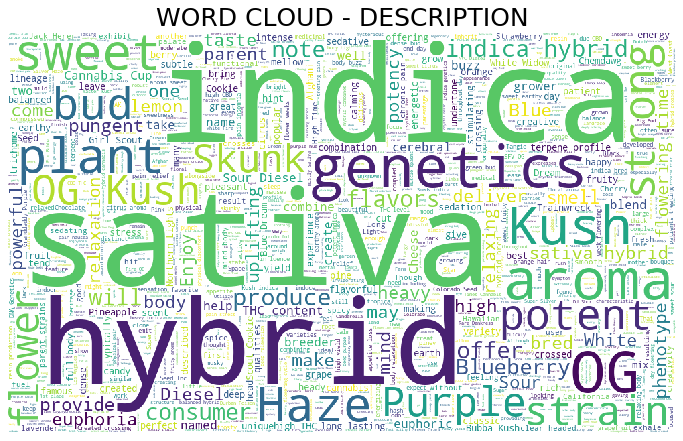

In [116]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'effects','flavor','dominant','known','cross'] #from the list above, we are keeping words relevant to the analysis
stopwords.update(newStopWords)

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=1500,
                      max_font_size=200, 
                      width=1000, height=600,
                      random_state=42,
                      ).generate(" ".join(df2['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()